In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib
matplotlib.rcParams['font.family'] ='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] =False

In [2]:
df = pd.read_csv('C:/Users/user/github/Data/energy/train.csv', encoding='cp949')

In [3]:
df.date_time = pd.to_datetime(df.date_time)

In [4]:
df_1 = df[df['num']==1]

<Axes: >

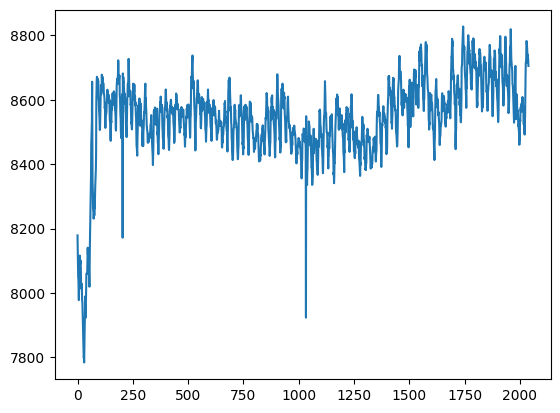

In [5]:
df_1['전력사용량(kWh)'].plot()

In [6]:
group = df.groupby(['num','date_time']).mean()

In [7]:
df[df['태양광보유'] == 1].num.unique()

array([ 3,  4,  8,  9, 12, 14, 16, 21, 23, 24, 26, 27, 30, 34, 36, 37, 38,
       39, 40, 42, 43, 44, 45, 47, 51, 52, 55, 56, 60], dtype=int64)

<Axes: xlabel='num', ylabel='전력사용량(kWh)'>

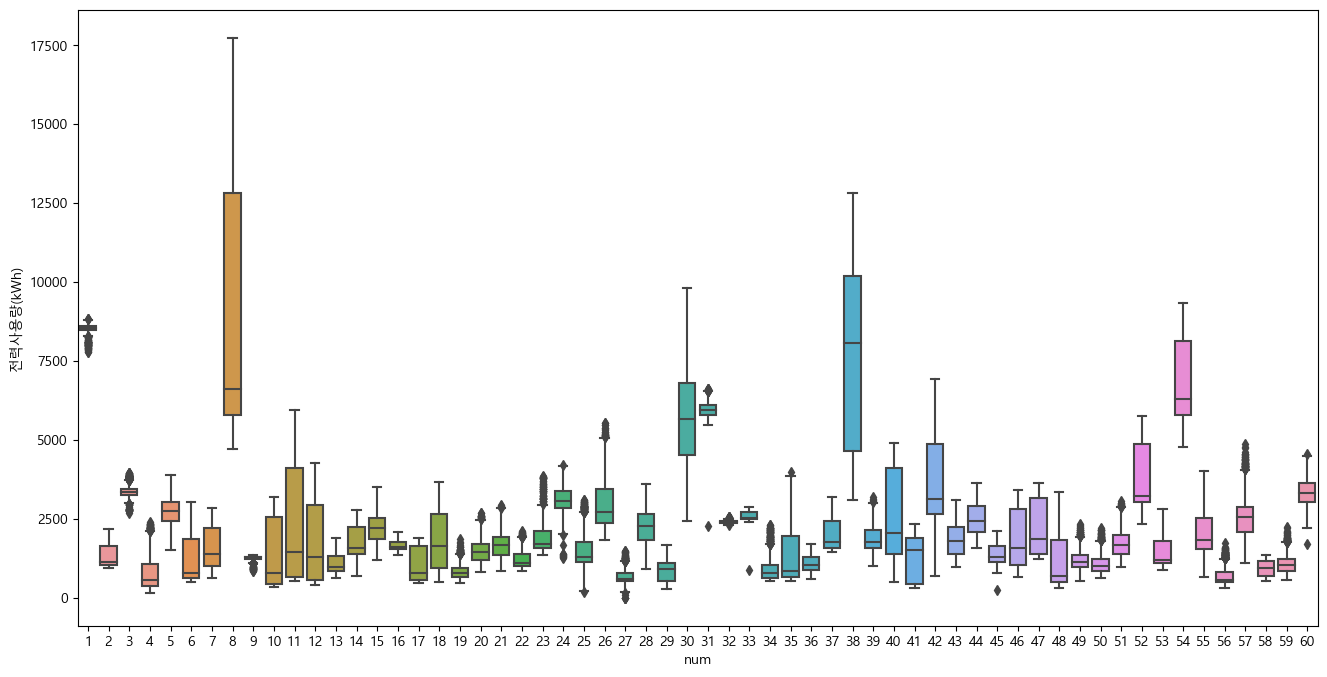

In [14]:
plt.figure(figsize=(16,8))
sns.boxplot(x='num', y='전력사용량(kWh)', data=df)

In [ ]:
sns.lineplot

<Axes: xlabel='date_time', ylabel='전력사용량(kWh)'>

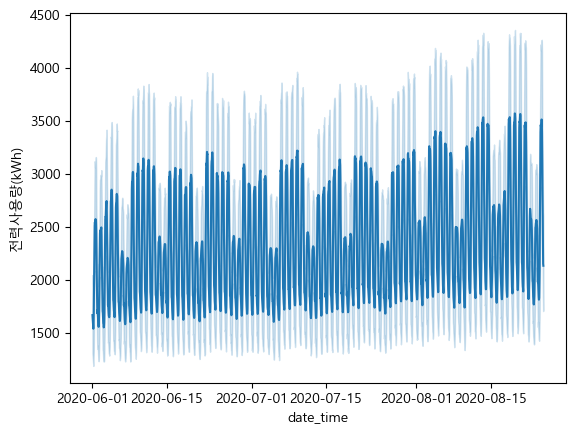

In [23]:
sns.lineplot(x='date_time', y='전력사용량(kWh)', data = df.groupby(['num','date_time']).mean())

In [34]:
eda_df = df.copy()

In [35]:
eda_df['month'] = 0
eda_df['hour'] = 0
eda_df['year'] = 0
eda_df['day'] = 0

In [37]:
for i in range(len(eda_df)):
    eda_df['month'][i] = eda_df.date_time[i].month
    eda_df['hour'][i] = eda_df.date_time[i].hour
    eda_df['year'][i] = eda_df.date_time[i].year
    eda_df['day'][i] = eda_df.date_time[i].day

In [41]:
eda_df.columns

Index(['num', 'date_time', '전력사용량(kWh)', '기온(°C)', '풍속(m/s)', '습도(%)',
       '강수량(mm)', '일조(hr)', '비전기냉방설비운영', '태양광보유', 'month', 'hour', 'year',
       'day'],
      dtype='object')

In [43]:
eda_df

,num,date_time,전력사용량(kWh),기온(°C),풍속(m/s),습도(%),강수량(mm),일조(hr),비전기냉방설비운영,태양광보유,month,hour,year,day
0,1,2020-06-01 00:00:00,8179.056,17.6,2.5,92.0,0.8,0.0,0.0,0.0,6,0,2020,1
1,1,2020-06-01 01:00:00,8135.640,17.7,2.9,91.0,0.3,0.0,0.0,0.0,6,1,2020,1
2,1,2020-06-01 02:00:00,8107.128,17.5,3.2,91.0,0.0,0.0,0.0,0.0,6,2,2020,1
3,1,2020-06-01 03:00:00,8048.808,17.1,3.2,91.0,0.0,0.0,0.0,0.0,6,3,2020,1
4,1,2020-06-01 04:00:00,8043.624,17.0,3.3,92.0,0.0,0.0,0.0,0.0,6,4,2020,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122395,60,2020-08-24 19:00:00,4114.368,27.8,2.3,68.0,0.0,0.7,1.0,1.0,8,19,2020,24
122396,60,2020-08-24 20:00:00,3975.696,27.3,1.2,71.0,0.0,0.0,1.0,1.0,8,20,2020,24
122397,60,2020-08-24 21:00:00,3572.208,27.3,1.8,71.0,0.0,0.0,1.0,1.0,8,21,2020,24
122398,60,2020-08-24 22:00:00,3299.184,27.1,1.8,74.0,0.0,0.0,1.0,1.0,8,22,2020,24


In [44]:
eda_df.drop(['기온(°C)','풍속(m/s)','습도(%)','강수량(mm)','일조(hr)','비전기냉방설비운영','태양광보유'], axis=1, inplace=True)

In [50]:
mean = eda_df.groupby(['num','hour']).mean()['전력사용량(kWh)']

In [49]:
std = eda_df.groupby(['num','hour']).std()['전력사용량(kWh)']

In [64]:
mean[6%12]

hour
0      625.307294
1      603.472235
2      592.475294
3      585.785647
4      580.029882
5      580.982824
6      621.965647
7      777.453882
8     1188.451059
9     1714.169647
10    1877.713412
11    1899.821647
12    1854.410824
13    1959.393176
14    1971.749647
15    1990.154118
16    1912.444941
17    1743.294706
18    1296.247765
19    1036.298118
20     890.536235
21     771.501176
22     694.522588
23     650.935059
Name: 전력사용량(kWh), dtype: float64

In [76]:
mean[59]

hour
0      853.435059
1      821.145600
2      813.064659
3      824.728659
4      883.932988
5      942.214871
6      927.634871
7      957.202729
8     1108.016153
9     1261.912796
10    1269.210281
11    1266.623427
12    1294.370588
13    1311.568535
14    1301.101528
15    1266.168208
16    1255.848958
17    1177.794715
18    1123.886667
19    1148.193113
20    1036.887958
21     988.269120
22     974.691106
23     887.897768
Name: 전력사용량(kWh), dtype: float64

In [80]:
eda_df[eda_df['num']==1]

,num,date_time,전력사용량(kWh),month,hour,year,day
0,1,2020-06-01 00:00:00,8179.056,6,0,2020,1
1,1,2020-06-01 01:00:00,8135.640,6,1,2020,1
2,1,2020-06-01 02:00:00,8107.128,6,2,2020,1
3,1,2020-06-01 03:00:00,8048.808,6,3,2020,1
4,1,2020-06-01 04:00:00,8043.624,6,4,2020,1
...,...,...,...,...,...,...,...
2035,1,2020-08-24 19:00:00,8714.952,8,19,2020,24
2036,1,2020-08-24 20:00:00,8740.224,8,20,2020,24
2037,1,2020-08-24 21:00:00,8730.504,8,21,2020,24
2038,1,2020-08-24 22:00:00,8725.968,8,22,2020,24


In [77]:
# 예측 모형
def predict(data, mean, std):
    # 각 시간마다 평균값과 분산을 다르게 설정
    predicted_values = []
    for i in range(len(data)):
        # 각 시간마다 평균값과 분산 설정
        mu_i = mean[i % 12]
        std_i = std[i % 12]

        # 예측값 계산
        y_i = np.random.normal(mu_i, std_i)
        predicted_values.append(y_i)

    return predicted_values

# 예측값 출력
#predicted_values = predict(data)

In [91]:
num_1 = predict(eda_df[eda_df['num']==1]['전력사용량(kWh)'], mean[1], std[1])

<Axes: >

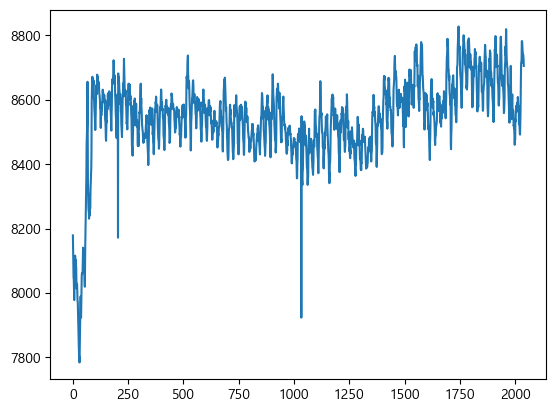

In [93]:
eda_df[eda_df['num']==1]['전력사용량(kWh)'].plot()

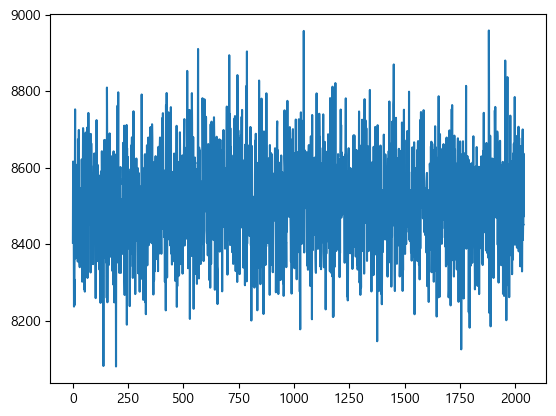

In [92]:
plt.plot(num_1)